In [13]:
import pandas as pd
import pickle
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os

In [ ]:
def load_test_data(test_path="splits/test.csv"):
    """Load and preprocess test data"""
    df_test = pd.read_csv(test_path)
    X_test = df_test["Message"]
    y_test = df_test["Category"].map({'spam': 1, 'ham': 0})  
    return X_test, y_test

X_test, y_test = load_test_data()
print(f"Test samples: {len(X_test)}")
print("\nSample messages:")
print(X_test.head())
print("\nCorresponding labels:")
print(y_test.head())

Test samples: 1115

Sample messages:
0    Squeeeeeze!! This is christmas hug.. If u lik ...
1    And also I've sorta blown him off a couple tim...
2    Mmm thats better now i got a roast down me! i...
3        Mm have some kanji dont eat anything heavy ok
4    So there's a ring that comes with the guys cos...
Name: Message, dtype: object

Corresponding labels:
0    0
1    0
2    0
3    0
4    0
Name: Category, dtype: int64


In [ ]:
def load_model(model_path="models/xgboost_model.pkl"):
    """Load the trained model"""
    if not os.path.exists(model_path):
        raise FileNotFoundError(f"Model file not found at {model_path}")
    return pickle.load(open(model_path, "rb"))

model = load_model()
print("Model loaded successfully")

Model loaded successfully


In [ ]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  


results_df = pd.DataFrame({
    'Message': X_test,
    'True_Label': y_test.map({1: 'spam', 0: 'ham'}),  
    'Predicted_Label': pd.Series(y_pred).map({1: 'spam', 0: 'ham'}),  
    'Spam_Probability': y_pred_proba
})

print("\nSample predictions:")
print(results_df.head(10))


Sample predictions:
                                             Message True_Label  \
0  Squeeeeeze!! This is christmas hug.. If u lik ...        ham   
1  And also I've sorta blown him off a couple tim...        ham   
2  Mmm thats better now i got a roast down me! i...        ham   
3      Mm have some kanji dont eat anything heavy ok        ham   
4  So there's a ring that comes with the guys cos...        ham   
5  Sary just need Tim in the bollox &it hurt him ...        ham   
6  Love isn't a decision, it's a feeling. If we c...        ham   
7  My supervisor find 4 me one lor i thk his stud...        ham   
8                 Dear good morning now only i am up        ham   
9                         I'm in chennai velachery:)        ham   

  Predicted_Label  Spam_Probability  
0             ham          0.001895  
1            spam          0.812059  
2             ham          0.014449  
3             ham          0.011726  
4             ham          0.001166  
5            


Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       966
        spam       0.98      0.87      0.92       149

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix:


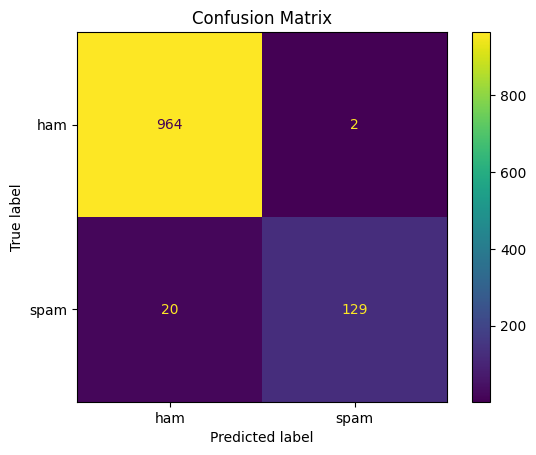


False Positives (Ham misclassified as Spam): 2
False Negatives (Spam misclassified as Ham): 20
Accuracy: 0.9803
Precision (Spam): 0.9847
Recall (Spam): 0.8658


In [ ]:
def evaluate_model(y_true, y_pred):
    """Print comprehensive evaluation metrics"""
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['ham', 'spam']))
    
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['ham', 'spam'])
    disp.plot()
    plt.title('Confusion Matrix')
    plt.show()
 
    tn, fp, fn, tp = cm.ravel()
    print(f"\nFalse Positives (Ham misclassified as Spam): {fp}")
    print(f"False Negatives (Spam misclassified as Ham): {fn}")
    print(f"Accuracy: {(tp + tn) / (tp + tn + fp + fn):.4f}")
    print(f"Precision (Spam): {tp / (tp + fp):.4f}")
    print(f"Recall (Spam): {tp / (tp + fn):.4f}")

evaluate_model(y_test, y_pred)

In [18]:
results_df.to_csv("predictions/test_predictions.csv", index=False)
print("Predictions saved to predictions/test_predictions.csv")

Predictions saved to predictions/test_predictions.csv


In [20]:
test_results = pd.read_csv('predictions/test_predictions.csv')
test_results.sample(20)

,Message,True_Label,Predicted_Label,Spam_Probability
1018,HARD BUT TRUE: How much you show &amp; expres...,ham,ham,0.002225
1106,I was up all night too worrying about this app...,ham,ham,0.003896
506,Then anything special?,ham,ham,0.009099
916,Just checking in on you. Really do miss seeing...,ham,ham,0.009971
122,Anything lar...,ham,ham,0.009728
508,Watching tv now. I got new job :),ham,ham,0.026468
715,Call me when u're done...,ham,ham,0.001593
73,Todays Voda numbers ending 5226 are selected t...,spam,spam,0.993489
671,Once a fishrman woke early in d mrng. It was v...,ham,ham,0.003213
551,FREE UNLIMITED HARDCORE PORN direct 2 your mob...,spam,spam,0.988217
